In [5]:
# place folder `PNlib` near to *.ipynb, 
# or make symbolic / junction link (Windows: mklink /j PNlib "c:\dir\PNlib")

# Codefolding extension is used here.

In [6]:
from PNlib.PolyNum import PolyNum
%matplotlib inline


# Laplace and Z transform

## Laplace transform

The functions of continuous time defined for $t \geq 0$, can be expressed in **Mikusinski's operational calculus** in form of functions of **Heaviside's operator** $ p = \cfrac{1}{\int_0^t} $ where $X(p)$ denote Laplace transform formulas: 

$$
\{ x (t) \} = X(p) \color{brown}{ \cdot p \cdot \{1\} }
$$

$ \{1\} $ denotes function, with value $ 1 $ for all $ t \geq 0 $.

For example $ \{ 200\ sin(t) \} = 200\ \cfrac{2}{p^2 + 4} \color{brown}{  \cdot  p \cdot \{1\} }$.

##  Z-transform

Z-transform corresponds to $ \{ x (t) \} $ is determined by series of samples in discrete time $ t_k = k\ h $, where $ k = 0, 1,\dots$ and $ h $ is the sampling period:

$$
\underline{x} = (^\sim x_0\!^\sim, x_1\!^\sim x_2\!^\sim \dots ^\sim) = \left.(x_0 \,z^0 + x_1 \,z^{-1} + x_2 \,z^{-2} + \dots)\right|_{z\,=\,(^\sim 1 ^\sim 0 ^\sim)}\\
$$

Replacing continuous time function $\{1\}$ by sequence of samples $
(^\sim 0.5^\sim, 1^\sim 1^\sim1^\sim \dots^\sim)
$
and replacing Heaviside operator $ p $ utilizing algorithm of numerical integration
$$
\underline{p} = \frac{2}{h} \left.\frac{1 - z^{-1}}{1 + z^{-1}}\right|_{z = (^\sim 1 ^\sim 0 ^\sim)} 
= \frac{2}{h} \frac{(^\sim 1 ^\sim , -1 ^\sim)}{(^\sim 1 ^\sim , 1 ^\sim)}
= \frac{1}{h}\ (^\sim 2^\sim, -4^\sim 4^\sim -4^\sim \dots^\sim) \\
$$
we obtain expression for approximate sequence of samples of function $\{ x(t) \}$:


$$
\\
\underline{x} = X (\underline{p}) \color{brown}{  \cdot \underline{p} \cdot (^\sim0.5^\sim, 1^\sim1^\sim1^\sim \dots ^\sim) }
$$

Example:
<div style="float: left; width: 30%;">
<img src="./img/eRLCuc_.png">
</div>
$
Z_C(p) = \cfrac{1}{p C}, \ \  Z(p) = R + p L + Z_C(p), \\
\{i(t)\} = \cfrac{E_0\, p^{-1} + L\, i(0) - u_C(0)\, p^{-1}}{Z(p)} \color{brown}{  \cdot p \cdot \{1\} }
$

Assuming $i(0) = 0,  u_C(0) = 0 $

$$
\{u_C(t)\} = (\ E_0\, p^{-1}\ Z_C(p)\ /\ Z(p)\ ) \color{brown}{  \cdot p \cdot \{1\} } = (\ E_0 \cdot \{1\}\ )\ Z_C(p)\ /\ Z(p)
$$




In [7]:
# Z-transform (live example):
h = 0.01 # sampling period
p = 1/h * PolyNum('const:(~2~,-4~4~-4~4~...~)')
# p_trap(h) = (2/h)*(~1~-1~) / (~1~1~) = (1/h) * (~2~,-4~4~-4~4~...~)
E_0 = 10  # const for t > 0
E = E_0 * 0.5 * PolyNum('const:(~1~,2~2~2~2~...~)')
R, L, C = 20, 2, 1e-3
Z_C = 1/(p*C)
Z = R + p*L + Z_C
U_C = E * Z_C / Z

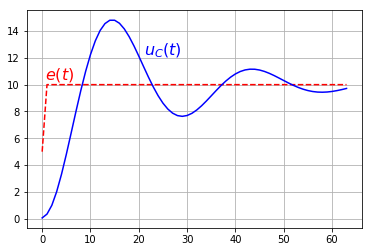

In [8]:
# plt.plot(E, 'r--',U_C, 'b-') 
import matplotlib.pyplot as plt
plt.plot(E, 'r--',U_C, 'b-')
plt.text(0.6,10.4,"$ e(t) $", fontsize=16, color='red')
plt.text(21,12.2,"$ u_C(t) $", fontsize=16, color='blue')
plt.grid(b=True)
plt.show()